In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv("Titanic_train.csv",index_col=0)
df_train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
df_test = pd.read_csv("Titanic_test.csv",index_col=0)
df_test.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


### Remove unwanted column

In [4]:
train_dataset = df_train.drop(columns=["Name","Ticket","Cabin"])
test_dataset = df_test.drop(columns=["Name","Ticket","Cabin"])

## EDA For Training Dataset

In [5]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [6]:
train_dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_dataset.shape

(891, 8)

#### Missing Value Detection

In [8]:
train_dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [9]:
train_dataset["Age"].fillna(train_dataset["Age"].median(), inplace=True)  # Due to outlier available

In [10]:
train_dataset["Embarked"].fillna(train_dataset["Embarked"].mode()[0], inplace=True)

In [11]:
train_dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
train_dataset.duplicated().sum()

116

In [13]:
train_dataset.drop_duplicates(inplace=True, ignore_index=True)
train_dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
770,0,3,female,39.0,0,5,29.1250,Q
771,1,1,female,19.0,0,0,30.0000,S
772,0,3,female,28.0,1,2,23.4500,S
773,1,1,male,26.0,0,0,30.0000,C


In [14]:
train_target = train_dataset["Survived"]

In [15]:
train_dataset.drop(columns='Survived', inplace=True)

In [16]:
train_dataset.shape

(775, 7)

In [17]:
train_dataset.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C


### Labeling of train dataset

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_dataset["Sex"] = le.fit_transform(train_dataset["Sex"])
train_dataset["Embarked"] = le.fit_transform(train_dataset["Embarked"])
train_dataset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


### Scaliing of Train dataset 

In [19]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
new_train = pd.DataFrame(ss.fit_transform(train_dataset), columns=train_dataset.columns)
new_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.883385,0.777531,-0.551060,0.475876,-0.500754,-0.527515,0.589252
1,-1.461216,-1.286122,0.611945,0.475876,-0.500754,0.695086,-1.892652
2,0.883385,-1.286122,-0.260308,-0.534545,-0.500754,-0.514627,0.589252
3,-1.461216,-1.286122,0.393881,0.475876,-0.500754,0.347909,0.589252
4,0.883385,0.777531,0.393881,-0.534545,-0.500754,-0.512240,0.589252


## EDA for Test Dataset 

In [20]:
test_dataset.duplicated().sum()

38

In [21]:
test_dataset.drop_duplicates(inplace=True, ignore_index=True)

In [22]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    380 non-null    int64  
 1   Sex       380 non-null    object 
 2   Age       322 non-null    float64
 3   SibSp     380 non-null    int64  
 4   Parch     380 non-null    int64  
 5   Fare      379 non-null    float64
 6   Embarked  380 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 20.9+ KB


In [23]:
test_dataset.describe()

,Pclass,Age,SibSp,Parch,Fare
count,380.000000,322.000000,380.000000,380.000000,379.000000
mean,2.218421,30.324534,0.484211,0.431579,38.152946
std,0.851618,14.370820,0.925889,1.021176,58.020997
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.925000
50%,2.000000,27.500000,0.000000,0.000000,15.245800
75%,3.000000,39.750000,1.000000,0.000000,36.877100
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [24]:
test_dataset.shape

(380, 7)

In [25]:
test_dataset.isnull().sum()

Pclass       0
Sex          0
Age         58
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [26]:
test_dataset["Age"].fillna(train_dataset["Age"].mean(), inplace=True)  

In [27]:
test_dataset["Fare"].fillna(train_dataset["Fare"].median(), inplace=True)

### Labeling of test dataset

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_dataset["Sex"] = le.fit_transform(test_dataset["Sex"])
test_dataset["Embarked"] = le.fit_transform(test_dataset["Embarked"])
test_dataset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


### Scalling of test dataset 

In [31]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
new_test = pd.DataFrame(ss.fit_transform(train_dataset), columns=train_dataset.columns)
new_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.883385,0.777531,-0.551060,0.475876,-0.500754,-0.527515,0.589252
1,-1.461216,-1.286122,0.611945,0.475876,-0.500754,0.695086,-1.892652
2,0.883385,-1.286122,-0.260308,-0.534545,-0.500754,-0.514627,0.589252
3,-1.461216,-1.286122,0.393881,0.475876,-0.500754,0.347909,0.589252
4,0.883385,0.777531,0.393881,-0.534545,-0.500754,-0.512240,0.589252


### Visulization 

In [32]:
train_dataset.shape,test_dataset.shape

((775, 7), (380, 7))

In [33]:
train_dataset.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.25,2


In [34]:
test_dataset.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1


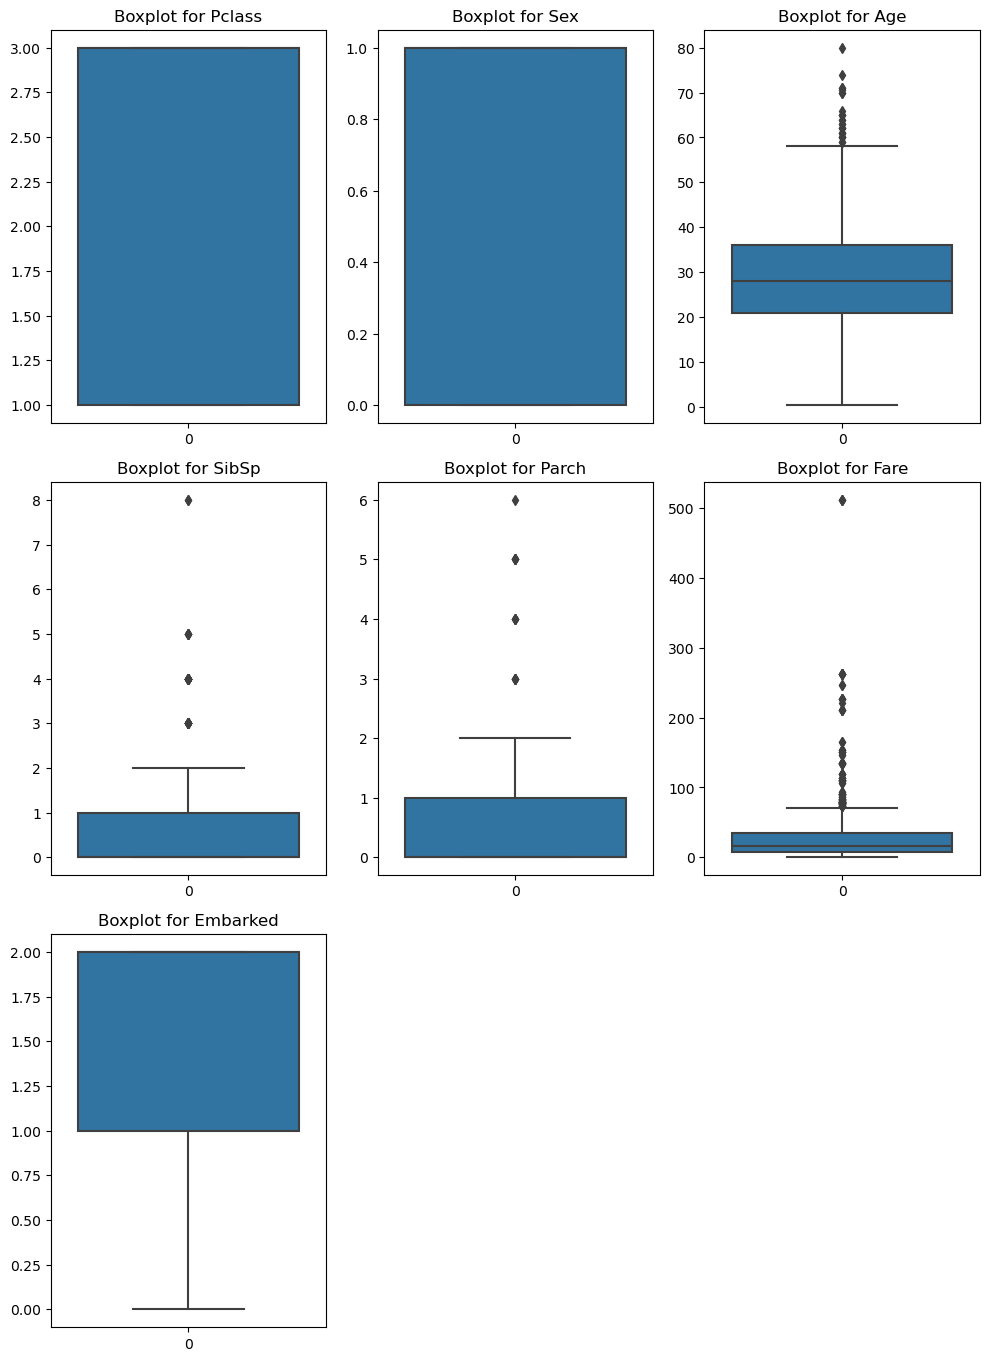

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axs=plt.subplots(nrows=4,ncols=3,figsize=(10,18))

axs = axs.flatten()

# Plot boxplots for each column in the DataFrame
for i, column in enumerate(train_dataset.columns):
    sns.boxplot(train_dataset[column], ax=axs[i])
    axs[i].set_title(f'Boxplot for {column}')

# Remove any unused subplots
for i in range(len(train_dataset.columns), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()


## Model Building 

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb


In [38]:
lgb_model = lgb.LGBMClassifier()
xgb_model = xgb.XGBClassifier()

In [39]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1


In [40]:
lgb_param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}

In [41]:
xgb_param_grid = {
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}


In [44]:
lgb_grid = GridSearchCV(estimator=lgb_model, param_grid=lgb_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit models
lgb_grid.fit(train_dataset, train_target)
xgb_grid.fit(train_dataset, train_target)

[LightGBM] [Info] Number of positive: 320, number of negative: 455
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 220
[LightGBM] [Info] Number of data points in the train set: 775, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.412903 -> initscore=-0.351976
[LightGBM] [Info] Start training from score -0.351976
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [3, 6],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [48]:
# Predict on the test set
lgb_y_pred = lgb_grid.best_estimator_.predict(train_dataset)
xgb_y_pred = xgb_grid.best_estimator_.predict(train_dataset)

In [49]:
# Evaluate models
lgb_metrics = evaluate_model(train_target, lgb_y_pred)
xgb_metrics = evaluate_model(train_target, xgb_y_pred)

print("LightGBM Metrics: Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(*lgb_metrics))
print("XGBoost Metrics: Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(*xgb_metrics))


LightGBM Metrics: Accuracy: 0.93, Precision: 0.93, Recall: 0.93, F1-Score: 0.93
XGBoost Metrics: Accuracy: 0.87, Precision: 0.87, Recall: 0.87, F1-Score: 0.87


## LightGBM Metrics: Accuracy: 0.93, Precision: 0.93, Recall: 0.93, F1-Score: 0.93

## XGBoost Metrics: Accuracy: 0.87, Precision: 0.87, Recall: 0.87, F1-Score: 0.87

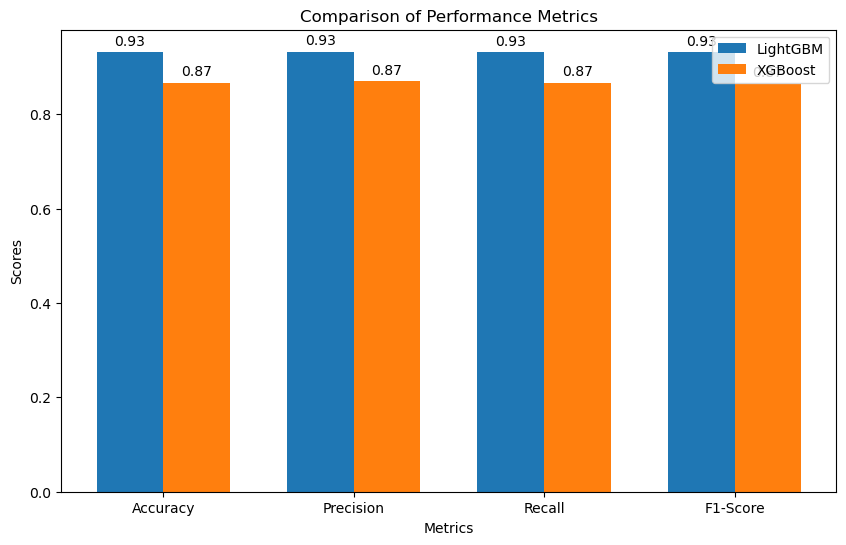

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
lgb_values = lgb_metrics
xgb_values = xgb_metrics

# 1. Plotting the Performance Metrics
def plot_metrics(metrics, lgb_values, xgb_values):
    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(metrics))
    width = 0.35
    
    bars1 = ax.bar(x - width/2, lgb_values, width, label='LightGBM')
    bars2 = ax.bar(x + width/2, xgb_values, width, label='XGBoost')

    ax.set_xlabel('Metrics')
    ax.set_ylabel('Scores')
    ax.set_title('Comparison of Performance Metrics')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()

    for bar in bars1 + bars2:
        height = bar.get_height()
        ax.annotate('%.2f' % height,
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    plt.show()

plot_metrics(metrics, lgb_values, xgb_values)

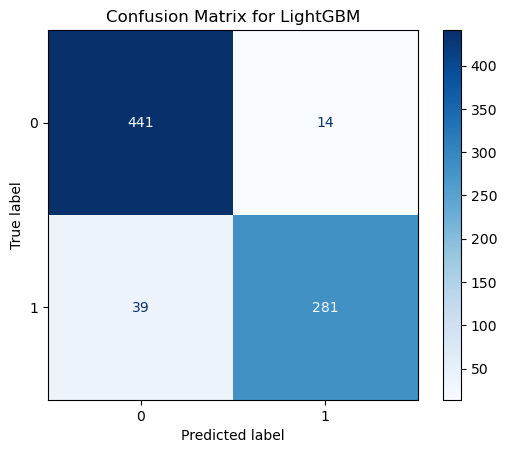

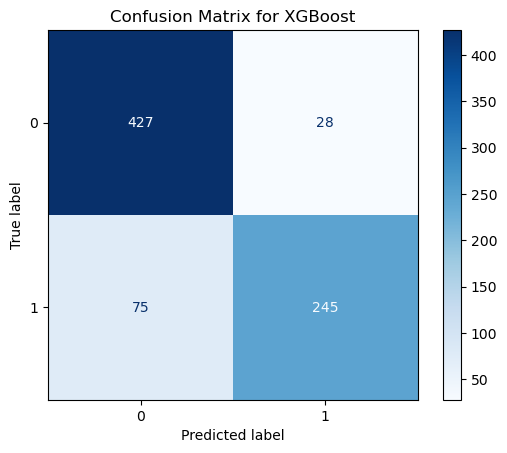

In [60]:
# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

plot_confusion_matrix(train_target, lgb_y_pred, 'LightGBM')
plot_confusion_matrix(train_target, xgb_y_pred, 'XGBoost')

In [61]:
# Feature Importance
def plot_feature_importance(model, model_name, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title(f'Feature Importance for {model_name}')
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

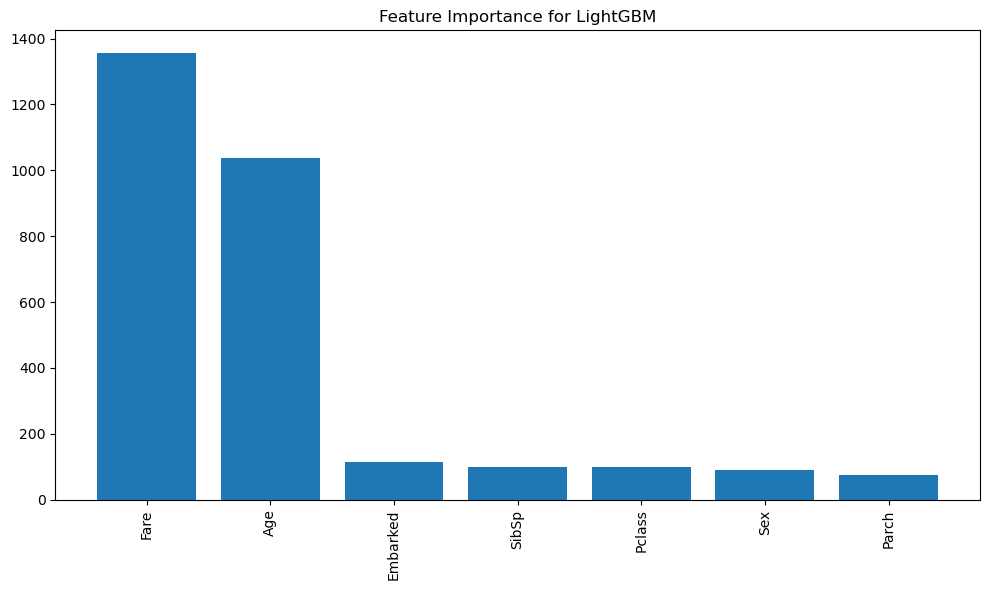

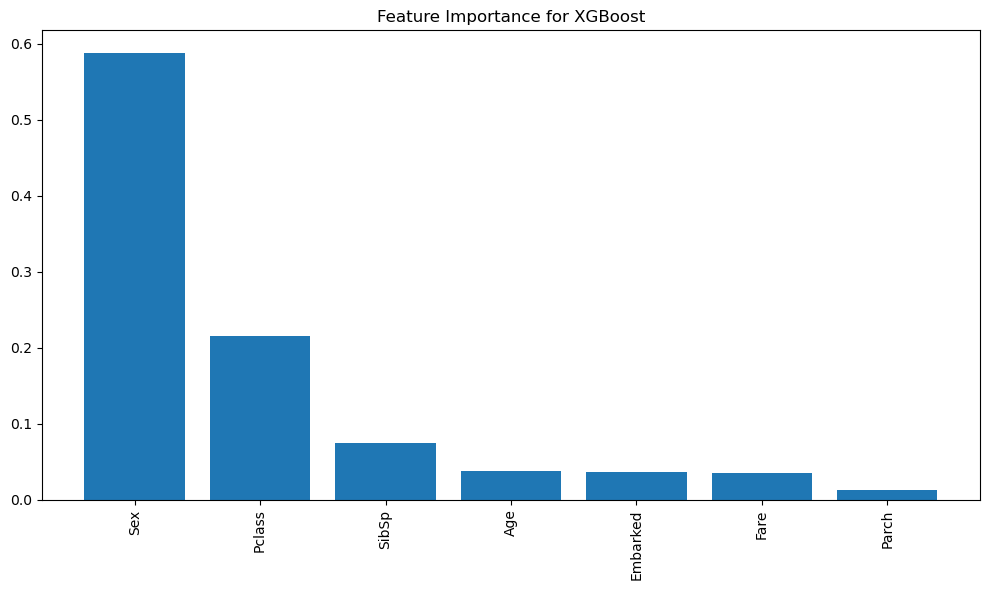

In [62]:
plot_feature_importance(lgb_grid.best_estimator_, 'LightGBM', train_dataset.columns)
plot_feature_importance(xgb_grid.best_estimator_, 'XGBoost', train_dataset.columns)